In [5]:
import os
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import pickle
import numpy as np

##Carga de los Datos
Se hace la carga de los datos desde la ruta Data y se separa el dataframe solo con los datos de vino blanco

In [6]:
mapeo_columnas = {
    'fixed acidity': 'fixed_acidity', 
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid', 
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}


In [7]:
df_wine_quality = pd.read_csv("../data/winequalityN.csv")
df_wine_quality = df_wine_quality.rename(columns=mapeo_columnas)
datos_white = df_wine_quality[df_wine_quality['type'] == 'white']
datos_white.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##Separar los datos en Test y Train

In [11]:
np.random.seed(101)
sample = np.random.choice(datos_white.index, size=int(0.8 * len(datos_white)), replace=False)
datos_white_train = datos_white.loc[sample]
datos_white_test = datos_white.drop(sample)
display(datos_white_train.head())
display(datos_white_test.head())

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4576,white,5.9,0.30,0.29,1.10,0.036,23.0,56.0,0.99040,3.19,0.38,11.3,5
167,white,6.7,0.46,0.18,2.40,0.034,25.0,98.0,0.98960,3.08,0.44,12.6,7
1889,white,7.6,0.15,0.40,1.30,0.036,24.0,112.0,0.99320,3.14,0.76,10.0,5
958,white,6.6,0.20,0.32,1.10,0.039,25.0,78.0,0.99260,3.39,0.54,10.2,7
3010,white,6.7,0.25,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,5


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
11,white,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
13,white,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7
14,white,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5
15,white,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7


# Prepocesar datos

Para nuestro caso de analisis vamos a aplicar una normalizacion

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [23]:
N_SAMPLES = 4898 
FEATURES = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']
TARGET = 'quality'

datos_white = pd.DataFrame({
    col: np.random.rand(N_SAMPLES) * np.random.randint(1, 10) for col in FEATURES
})
datos_white[TARGET] = np.random.randint(4, 9, N_SAMPLES)

X = datos_white[FEATURES]
y = datos_white[TARGET]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.80 = 0.20 (20% para Validation)


preprocessor_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor_pipeline.fit(X_train)

X_train_scaled = preprocessor_pipeline.transform(X_train)
X_val_scaled = preprocessor_pipeline.transform(X_val)
X_test_scaled = preprocessor_pipeline.transform(X_test)

# 4. Verificación y Persistencia (MLOps)
print(f"Media de 'alcohol' en X_train original: {X_train['alcohol'].mean():.4f}")
print(f"Media de 'alcohol' en X_train escalado: {X_train_scaled[:, X_train.columns.get_loc('alcohol')].mean():.4f}") # La media debe ser cercana a 0

# Guardar el Pipeline (¡Esto es clave para el MLOps!)
# Debes guardar el objeto preprocessor_pipeline para usarlo en producción
# cuando llegue un nuevo dato de vino.

OUTPUT_DIR = "./data/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

with open(os.path.join(OUTPUT_DIR, "preprocessor_pipeline.pkl"), "wb") as f:
    pickle.dump(preprocessor_pipeline, f)

print("-" * 50)
print(f"✅ Pipeline y datos escalados listos. El preprocesador se guardó en: {OUTPUT_DIR}")


Media de 'alcohol' en X_train original: 0.5015
Media de 'alcohol' en X_train escalado: -0.0000
--------------------------------------------------
✅ Pipeline y datos escalados listos. El preprocesador se guardó en: ./data/


Entrenar
Antes de ejecutar lo siguiente correr en la terminal en la misma carpeta donde esta el notebook:

Levantar en otra terminal mlflow ui

mlflow server --backend-store-uri sqlite:///backend.db

matar procesos que este arriba sudo lsof -i :5000

In [31]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [32]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:5000'


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

experiment_name = "White_wine_experiment1_RFR"
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    rf = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("rmse", rmse)

2025/10/03 11:19:04 INFO mlflow.tracking.fluent: Experiment with name 'White_wine_experiment1_RFR' does not exist. Creating a new experiment.


🏃 View run respected-cat-917 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/eb626177ae624039a3d8cf4f3c9d5631
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


In [34]:
import xgboost as xgb

with mlflow.start_run():
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("rmse", rmse)

🏃 View run lyrical-quail-738 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/f724d6df095946448faf7c162f91f233
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


In [35]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


with mlflow.start_run(run_name="SVR_Baseline"): # Damos un nombre descriptivo a esta ejecución
    
    svr_reg = SVR(
        kernel='rbf', # Un kernel común para problemas de regresión no lineales
        C=1.0,        # Parámetro de penalización (rigidez de la restricción de error)
        gamma='scale' # Coeficiente de kernel (cuánto influye un único ejemplo de entrenamiento)
    )
    
    print("Iniciando entrenamiento SVR...")
    svr_reg.fit(X_train, y_train)
    print("Entrenamiento SVR finalizado.")
    
    y_pred = svr_reg.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    mlflow.log_param("kernel", 'rbf')
    mlflow.log_param("C", 1.0)
    mlflow.log_param("gamma", 'scale')
    
    mlflow.log_metric("rmse", rmse)
    
    mlflow.sklearn.log_model(svr_reg, "model_svr_baseline")
    
    print(f"SVR RMSE registrado en MLflow: {rmse:.4f}")

Iniciando entrenamiento SVR...
Entrenamiento SVR finalizado.


2025/10/03 11:21:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 11:21:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/03 11:21:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR RMSE registrado en MLflow: 1.4613
🏃 View run SVR_Baseline at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/4032e809c0484d18b3a7562e6b071ef7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


In [37]:
import optuna

mlflow.set_experiment("White_wine_experiment1_RFR")

def objective(trial):
    with mlflow.start_run():
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
            'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 6, 1),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, 1),
            'random_state': 42,
            'n_jobs': -1
        }
        mlflow.log_params(params)

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mlflow.log_metric("rmse", rmse)

    return rmse

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-10-03 11:25:24,434] A new study created in memory with name: no-name-0ac309ed-1fd9-4ce2-aa03-9abd4a911a87
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprec

🏃 View run incongruous-hawk-684 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/2c83d6b0aa9442e5bab7aa517fffd53f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run rumbling-newt-696 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/967bc0d4c91441c1a7651a2f4299c64d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run thoughtful-calf-39 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5e7766ed27ec485da4d7c21744a01a91
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run melodic-lamb-153 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/db76348a71854b3b8ea58e1edc1b795e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run judicious-elk-797 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/a95b9a255d4849d4ba49c61356bec140
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run gregarious-bat-723 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/4f53b39561fd44819a66d0ce4094f3f8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run sedate-stork-861 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/2dff7cc436bd4a48ac1b0369405be16a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run fearless-moose-414 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/6290cd761a434894a8d231df31a100a1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run intelligent-flea-811 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ec167608823e422a90d2d233425eed07
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run angry-finch-611 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5da83ec3202a4a12817d73edb51213eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


[I 2025-10-03 11:25:25,994] Trial 10 finished with value: 1.4402315918378588 and parameters: {'n_estimators': 49, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 7 with value: 1.4377813925429332.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword 

🏃 View run receptive-conch-774 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/e10c0b3d478449f8a8c3beb2f7dc4080
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run placid-squirrel-812 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/4dbadbc97fe4450eb047e877358afc95
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run handsome-owl-7 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/f648326c11de43b1b69f4f47537bc9ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run gentle-newt-763 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/3009b78cfb3b4f10952118124ad4a008
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run rumbling-panda-613 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/bbdaf3951c7149d284e34cdaf8660685
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run nervous-wasp-335 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/c2c6b60d66b247bfae6687167f33b85c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run selective-crab-265 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/17847238f8534c8cab036b218176ea5f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


[I 2025-10-03 11:25:27,048] Trial 17 finished with value: 1.442753549992835 and parameters: {'n_estimators': 49, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 7 with value: 1.4377813925429332.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword 

🏃 View run chill-ox-932 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/e19a699b166a41c6bbfa60ba79227053
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run glamorous-squid-123 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/9fabe86fa973456baca83ad58014420a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run stylish-robin-740 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/50ccff941a4a42f19575d7581a9f21ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


[I 2025-10-03 11:25:27,553] Trial 20 finished with value: 1.4428881445345714 and parameters: {'n_estimators': 46, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 7 with value: 1.4377813925429332.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword

🏃 View run efficient-zebra-374 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/4593fb8b29eb43f2967d6c157cf44177
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run efficient-grub-450 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/10b20114aa61451c93764c9db03e1451
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run unequaled-hog-729 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/46ef29aea761409aabff7f184e381248
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run nervous-mouse-719 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/91efeacf93374b218b6e4c5779d6598c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run hilarious-cow-402 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/67f21eaa576e4093bd8495671ec4a4fb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run judicious-frog-196 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/a155368251494164acf9881cf8a75a09
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run receptive-panda-483 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/fc080fc2f492454db6f9068beab40075
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run amazing-trout-580 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/3222edc1f3234ce8af460a1e5e760278
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run illustrious-seal-998 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/c5873659cc64415a8805db46834ecb8a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run clean-dolphin-184 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/28a8013353a74b6d9d7758191adf06a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run serious-steed-42 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/f194538128ca44d08d5d9d5c6b38fd3c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run resilient-wren-77 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/53267dc90d6848b4b802367224f90cdb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run amazing-wren-866 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/a44efc8f80944ec1a82dfa305a776123
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run calm-fowl-450 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/dd00e540e9ea45488dcf898a4f52addd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run clean-foal-762 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ec2456c428df4001857846b059309089
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run gifted-finch-10 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/27f29813b0af476ab75c0421593e724f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run fun-snipe-596 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ef1ffdbc8d7641a8b6b8008edb33721b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


[I 2025-10-03 11:25:29,917] Trial 37 finished with value: 1.4471573884900588 and parameters: {'n_estimators': 40, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 7 with value: 1.4377813925429332.


🏃 View run upset-toad-131 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/fbc3fbe0a23f46d08a986559eefc1ace
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run placid-squirrel-486 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/20e14a8863cf493f981fdfbf25a5c9a5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run wise-bass-739 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/a2f48755a7da48cda835010e608f04b2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run fearless-smelt-789 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/527a5e7da6ce4b4ea4af0f0bc62112a7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run blushing-lynx-504 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/9132ac77fb16489592ae41ab363e5c43
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword s

🏃 View run unique-toad-564 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/46330ed4b7bf4c11ad388827a0f96a0f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run aged-smelt-771 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/2fbaf63a0dcc44caaaf1a4e42015a26a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run adaptable-bird-203 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/6c03a29309dc4e5f8858ee5218c129ca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run salty-colt-609 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/037bbd83984a41b79e635e35cb5d47e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run redolent-worm-284 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/9d3bac5b77a94a3aa410714a3ff7b599
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run sneaky-worm-131 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/e5db2c9759cc44b48f1406af83a60e95
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run industrious-sow-96 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/eeda6bc790ab45cfab74dab21d08a3fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run efficient-fawn-219 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/6673a4f1337749f3a2b04231842bd39a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run auspicious-stork-621 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/c43a8eff30d34856879ca1ebbe941ede
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run bedecked-gull-924 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/2dbcc7164bfc40daac609112bb7e0fb0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run fortunate-snail-703 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/6bdc4db752264b3e8ccb9168b0441fbd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run valuable-mare-638 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/fa2399f6f40940369eae52d2cc014dc4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run judicious-hound-234 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/d2bd073c8f0947d080e7bfcb02857d1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run omniscient-dove-196 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ac8c2ac5c9fd48ada9ebcf308cae21c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run welcoming-pug-761 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/3653a16379b54f8ba337203b712e8876
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run bustling-fowl-33 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5ded92cadd2543a580a93197542a42c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run unruly-mule-683 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/737e6497647b477d9dc94564c5371239
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run lyrical-moose-310 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/342ad6c3bfa9443f88a04d23eb708cde
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run stately-shrimp-666 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/af9884d0e9c84b9fb3eff6df50f967d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run bright-gull-336 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5160f15867ff42218858510b1ef5e300
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run spiffy-sponge-856 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/6a9e52fc991f499e9e7548cdaa21e8e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run sassy-hound-21 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/010e5f77412d46528d596bbe3b72098f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run upbeat-robin-684 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/b14bbc0dbac0422cbbedda67857b4aa2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run gregarious-stork-121 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ad64ba891be54a4ba44a6e43092e8bbc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run sedate-eel-783 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/fe3d1b7c98864c189381e823fe88ebae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run glamorous-colt-188 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/97c892aaa5ba4c959762a35dd185b7c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run dashing-stoat-175 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/f90f146b1bc34a999c63d6b6e69a7aac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run placid-asp-438 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/98283b13973142c082dbac6409b50ab4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run wistful-skink-858 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/d172e805db0845fe8ca7cb70ed74b842
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run wistful-robin-705 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/eea24622737142abb4057abc33f3d2ee
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run intrigued-bird-964 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/d3aedac734f241f58820a379e79c8e47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run traveling-newt-877 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/02db994762e745a688225218d6e56891
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run trusting-slug-816 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5b0a30ead02b4477a03f0c3a1136a596
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run smiling-mink-827 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/d3600eb7c18a4dc19c7b5fb3c46db97d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run salty-crow-845 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/3deb4445bcdf41d2b708fd6111d6df8c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run unleashed-gnat-322 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/02ff6bda8b1b451f83347fb00642ba97
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run colorful-bird-633 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/26109eed00944d57a0af667ca8ed5839
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run spiffy-rook-949 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/0eef2f6531db45daa484b6d90cf02b20
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run merciful-worm-641 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/8804660d661f411daabac5c28842cf18
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run languid-dove-315 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/cb38da989bd54a2187f0922239c4acef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run dazzling-lynx-807 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/0a1a5cc7fc594b20a75b7ac21d7b3ff6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run funny-kit-854 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/2802446862da4456919d80d401d5b5b1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run able-dove-745 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/3a63875f76fd41f99ae6e1cc4bc2fc47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run handsome-toad-783 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/f8bdcbef80694051b65ab7b3da39f06e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run wise-shoat-576 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/e092474cdf6b4af3a66802c8d7fc0bd7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run able-sow-809 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/9a75e9921fdf4895a5999e20eea1ed3d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run delicate-dove-146 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/a116e7c3079b4de79fb43f7b516cac60
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run respected-newt-208 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/5e1852c387d84714b4fed438c04b1ca4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run bemused-koi-839 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/d49564931a6c4775940968dea40c202b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run persistent-wasp-874 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/c6265931c45d48ab86d8554656419b12
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run rebellious-shrew-463 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/69f32d22c4cf44a38ecc304021a5d074
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run worried-chimp-206 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/8a1aa7e0be8e4ab383bd8b7a001404fa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run spiffy-calf-864 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/90c1ff869e804ea49e53bf952bc44330
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'min_samples_split': trial.suggest_int('min_samples_split', 2, 6, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please u

🏃 View run burly-chimp-309 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/ccd5d2d1d1f140beabb8dbb6ebd09c74
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run omniscient-lark-672 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/84af7bf267824e01a09eaaf996088562
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run nosy-moose-932 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/aa07bddaba74461bac92404a884b70f8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the key

🏃 View run sassy-tern-728 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/e15c367f1d3548318c69f2e9a921aed0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771
🏃 View run placid-turtle-633 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/b42707a67ff14196b4e0765af9097ca9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


In [38]:
# Analyze the best trial
print(f"Best trial: {study.best_trial.number}")
print(f"Best value (RMSE): {study.best_value:.4f}")
print("Best params:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# Train the best model
best_params = study.best_params
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)
rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))

print(f"\nBest model RMSE: {rmse_best:.4f}")

Best trial: 98
Best value (RMSE): 1.4376
Best params:
  n_estimators: 22
  max_depth: 3
  min_samples_split: 2
  min_samples_leaf: 1

Best model RMSE: 1.4395


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/2665446357.py:6: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

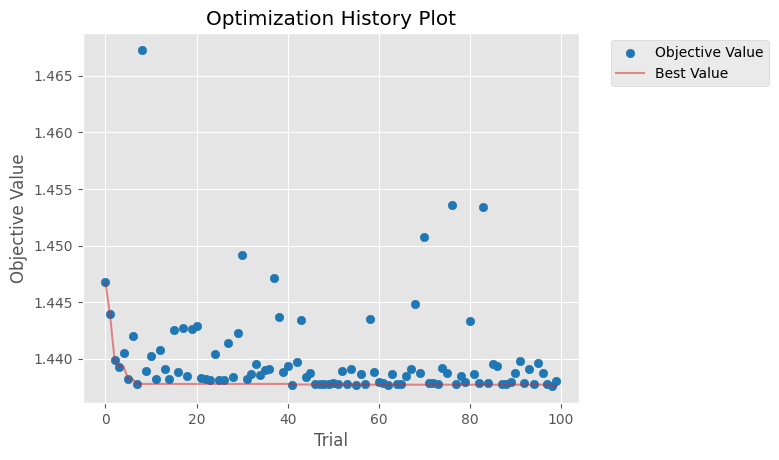

In [39]:
# Visualize optimization history
import matplotlib.pyplot as plt


# Optimization history
optuna.visualization.matplotlib.plot_optimization_history(study)

/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_8338/1036994904.py:1: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

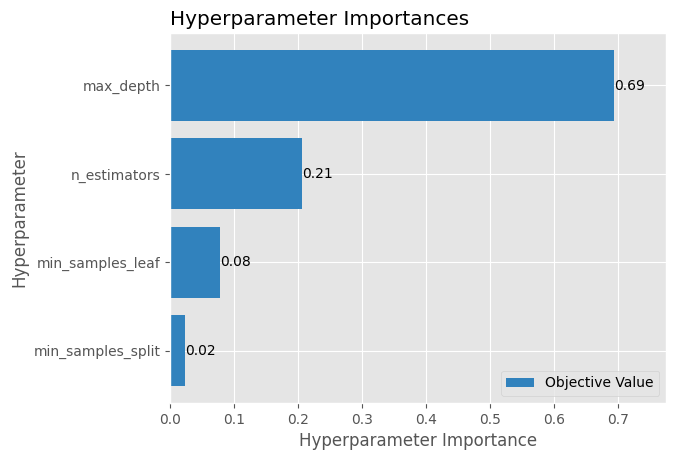

In [40]:
optuna.visualization.matplotlib.plot_param_importances(study)

In [41]:
# Register the best model
with mlflow.start_run(run_id=study.best_trial.user_attrs.get('mlflow_run_id')):
    # Log the model
    mlflow.sklearn.log_model(
        best_model, 
        "model",
        registered_model_name="White-Wine-optimized"
    )
    
    # Log preprocessing pipeline
    mlflow.sklearn.log_model(
        preprocessor, 
        "preprocessor",
        registered_model_name="white-wine-preprocessor"
    )

2025/10/03 11:29:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 11:29:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/03 11:29:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'White-Wine-optimized'.
2025/10/03 11:29:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: White-Wine-optimized, version 1


🏃 View run sedate-mule-517 at: http://127.0.0.1:5000/#/experiments/359158135218172771/runs/32deb99515ec48df9a23f2076a3505e2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/359158135218172771


Created version '1' of model 'White-Wine-optimized'.


NameError: name 'preprocessor' is not defined